Marketing Campaign for Banking Products

 Project Purpose
• The bank has a growing customer base and wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans.

• The bank wants to convert the liability-based customers to personal loan customers (while retaining them as depositors).

• A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success.

• The department wants you to build a model that will help to identify the potential customers who have a higher probability of purchasing the loan.

• So, this project aims to predict the target customer profile for the bank.

• This will increase the efficiency of the campaign and also reduce the customer unsatisfaction over such campaigns.

Attributes provided of Customer :

ID - Customer ID

Age - Customer age in completed years

Experience - Years of Professional Experience

Income - Annual Income

ZIP Code - Home Address Code

Family - Family Size

CCAvg - Average Spending on Credit Card month

Education - Education Level

Undergraduate 2. Graduate 3. Advanced/Professional
Mortgage - Value of House mortgage

Securities account - Does the customer has securities account with bank ?

CD account - Does the customer has certificate of deposit CD account bank ?

Online - Does the customer use internet banking Facilities ?

Credit Card - Does the customer use credit card issued by bank ?

Personal loan - did the customer take Personal Loan ?

In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#import the bank data and converting to dataframe
df=pd.read_excel(r'Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data')
#print first 5 rows
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [6]:
#print last 5 rows
df.tail()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [7]:
#give the dimension of data set
df.shape

(5000, 14)

In [8]:
#statistical summary of the data
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937913     1.881000    56.498800       0.096000   
std       1.147663     1.747666     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [9]:
#Return whether all elements are True, potentially over an axis.
df.all()

ID                     True
Age                    True
Experience            False
Income                 True
ZIP Code               True
Family                 True
CCAvg                 False
Education              True
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [10]:
#Check for the data types and null values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [11]:
#Cleaning unwanted data
df2=df.drop("ID",axis=1)
df2

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1    1.9          3         0   
4996   30           4      15     92037       4    0.4          1        85   
4997   63          39      24     93023       2    0.3          3         0   
4998   65          40      49     90034       3    0.5          2         0   
4999   28           4      83     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 13 columns]

In [12]:
#finding relation between age and expereince 
corltn = df2['Experience'].corr(df2['Age'])
corltn

0.9942148569683319

In [13]:
df3=df2.drop("Experience",axis =1)
df3

Age  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25      49     91107       4    1.6          1         0   
1      45      34     90089       3    1.5          1         0   
2      39      11     94720       1    1.0          1         0   
3      35     100     94112       1    2.7          2         0   
4      35      45     91330       4    1.0          2         0   
...   ...     ...       ...     ...    ...        ...       ...   
4995   29      40     92697       1    1.9          3         0   
4996   30      15     92037       4    0.4          1        85   
4997   63      24     93023       2    0.3          3         0   
4998   65      49     90034       3    0.5          2         0   
4999   28      83     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

In [14]:
#count of outliers in every attribute
#outliers are values which are more than 3 standard deviation away from mean
from scipy.stats import zscore
df4 = df3.copy() 
df5 = df3[['Age','Income','ZIP Code','CCAvg','Mortgage']]
#adding column for zscore of attribute
for i in df5 :
  
    df4["zscore"] = zscore(df4[i])

#condition to find outliers  
    condition = ( df4["zscore"] > 3 ) | ( df4["zscore"] < -3 )
    count = df4.loc[condition,i].count()
    df4.drop(df4[condition].index,axis='index',inplace = True)

In [15]:
df4

Age  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25      49     91107       4    1.6          1         0   
1      45      34     90089       3    1.5          1         0   
2      39      11     94720       1    1.0          1         0   
3      35     100     94112       1    2.7          2         0   
4      35      45     91330       4    1.0          2         0   
...   ...     ...       ...     ...    ...        ...       ...   
4995   29      40     92697       1    1.9          3         0   
4996   30      15     92037       4    0.4          1        85   
4997   63      24     93023       2    0.3          3         0   
4998   65      49     90034       3    0.5          2         0   
4999   28      83     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4995              0                   0           0       1           0   
4996              0                   0           0       1           0   
4997              0                   0           0       0           0   
4998              0                   0           0       1           0   
4999              0                   0           0       1           1   

        zscore  
0    -0.558493  
1    -0.558493  
2    -0.558493  
3    -0.558493  
4    -0.558493  
...        ...  
4995 -0.558493  
4996  0.296638  
4997 -0.558493  
4998 -0.558493  
4999 -0.558493  

[4777 rows x 13 columns]

In [16]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4777 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4777 non-null   int64  
 1   Income              4777 non-null   int64  
 2   ZIP Code            4777 non-null   int64  
 3   Family              4777 non-null   int64  
 4   CCAvg               4777 non-null   float64
 5   Education           4777 non-null   int64  
 6   Mortgage            4777 non-null   int64  
 7   Personal Loan       4777 non-null   int64  
 8   Securities Account  4777 non-null   int64  
 9   CD Account          4777 non-null   int64  
 10  Online              4777 non-null   int64  
 11  CreditCard          4777 non-null   int64  
 12  zscore              4777 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 522.5 KB


In [17]:
#Number of unique in each column
df4.nunique(axis = 'index')

Age                    45
Income                157
ZIP Code              464
Family                  4
CCAvg                  90
Education               3
Mortgage              258
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
zscore                258
dtype: int64

In [18]:
#Number of people with zero mortgage
count = df4.loc[df4['Mortgage'] == 0,'Mortgage'].count()
count

3376

In [19]:
#Number of people with zero credit card spending per month
spend_count=df4.loc[df4['CCAvg'] == 0,'CCAvg'].count()
spend_count

104

In [20]:
#value count of all categorical column

value_count = {}
for i in df4 :
  
  if i != 'zscore' :
    
    value_count[i] = df4[i].value_counts()  
   # print(value_count[i])    

In [21]:
#Univariate and Bivariate analysis

In [22]:
df4['Personal Loan'].value_counts()

0    4373
1     404
Name: Personal Loan, dtype: int64

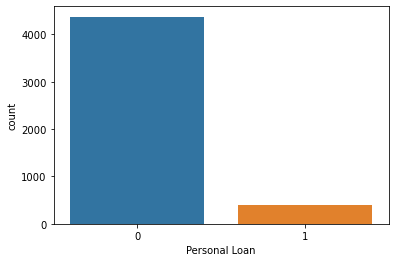

In [23]:
sns.countplot(df4['Personal Loan'])

In [24]:
value_count['Age']

43    142
35    142
58    137
52    137
54    136
30    134
50    132
41    131
59    130
56    130
39    127
34    126
57    125
40    125
55    124
51    124
31    124
60    122
62    121
61    120
46    118
45    118
42    116
29    116
32    116
33    113
48    112
44    110
38    109
47    109
49    108
53    104
36    104
63    102
28    100
37     98
27     85
65     79
64     74
26     72
25     53
24     25
66     24
67     12
23     11
Name: Age, dtype: int64

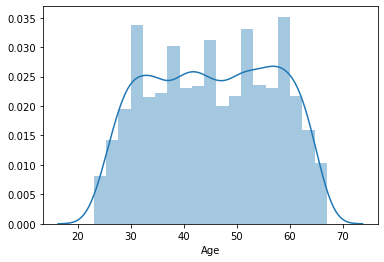

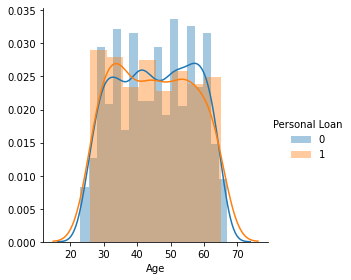

In [25]:
sns.distplot(df4['Age'])

sns.FacetGrid(df4,hue = 'Personal Loan',height = 4).map(sns.distplot,'Age').add_legend()

In [26]:
value_count['CCAvg']

0.300000    238
1.000000    229
0.200000    202
0.800000    186
2.000000    183
           ... 
5.333333      1
2.750000      1
3.666667      1
3.333333      1
4.666667      1
Name: CCAvg, Length: 90, dtype: int64

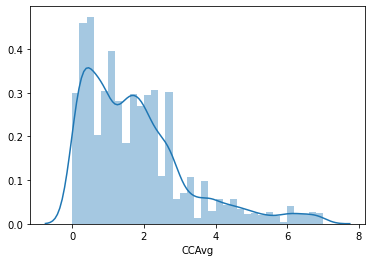

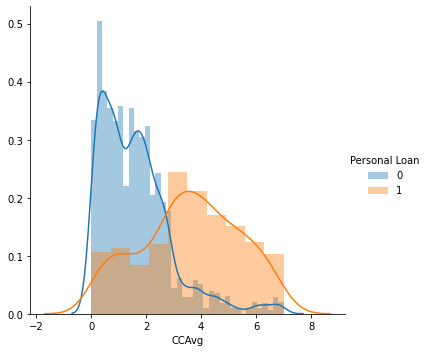

In [27]:
sns.distplot(df4['CCAvg'])
sns.FacetGrid(df4,hue = 'Personal Loan',height = 5).map(sns.distplot,'CCAvg').add_legend()

In [28]:
value_count['Income']

44     85
38     84
81     83
41     82
39     81
       ..
151     3
204     2
198     2
189     1
205     1
Name: Income, Length: 157, dtype: int64

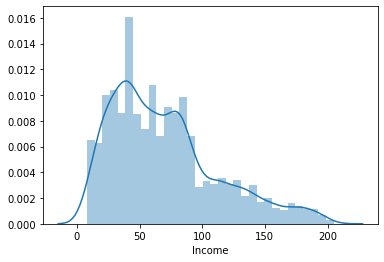

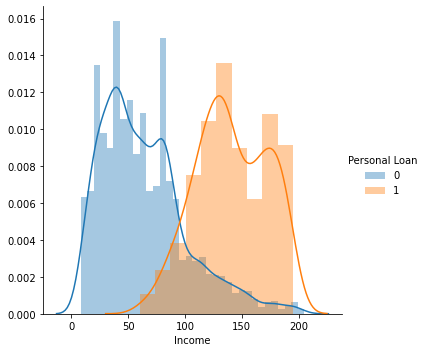

In [29]:
sns.distplot(df4['Income'])
sns.FacetGrid(df4,hue = 'Personal Loan',height = 5).map(sns.distplot,'Income').add_legend()

In [30]:
value_count['ZIP Code']

94720    163
94305    125
95616    112
90095     70
93943     53
        ... 
94404      1
95193      1
90813      1
94970      1
94965      1
Name: ZIP Code, Length: 464, dtype: int64

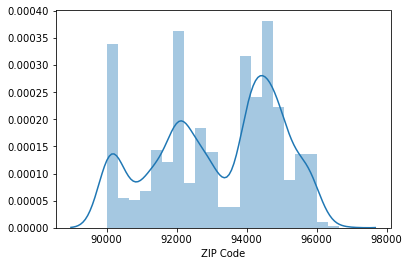

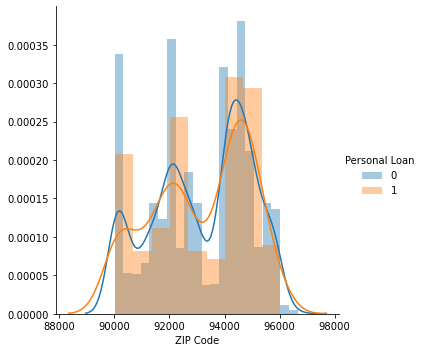

In [31]:
sns.distplot(df4['ZIP Code'])
sns.FacetGrid(df4,hue = 'Personal Loan',height = 5).map(sns.distplot,'ZIP Code').add_legend()

In [32]:
value_count['Family']

1    1402
4    1197
2    1195
3     983
Name: Family, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


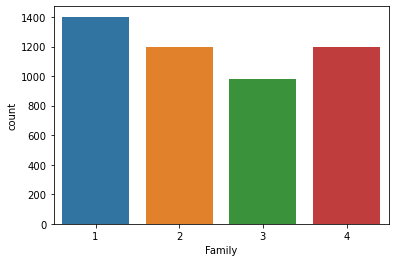

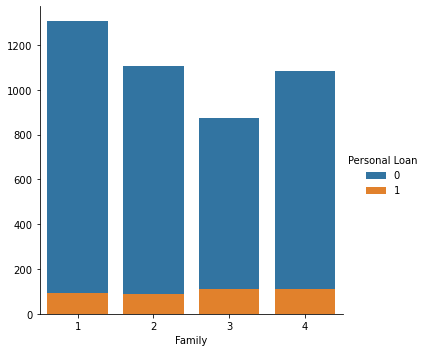

In [33]:
sns.countplot(df4['Family'])
sns.FacetGrid(df4,hue = 'Personal Loan',height = 5).map(sns.countplot,'Family').add_legend()

Text(0.5, 1.0, 'Percentage distribution of family size in Loan Customer')

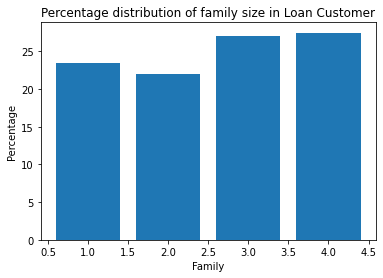

In [34]:
per_count_family = df4.loc[df['Personal Loan'] == 1]

values_count=per_count_family['Family'].value_counts()

count= per_count_family['Family'].count()

perc_count_family = (values_count/count)*100
perc_count_family_df = pd.DataFrame(perc_count_family,index = range(1,5)) 

x = perc_count_family_df.index
y = perc_count_family_df['Family']

plt.bar(x,y)
plt.ylabel("Percentage")
plt.xlabel('Family')
plt.title("Percentage distribution of family size in Loan Customer")

In [35]:
condition = (df4['Personal Loan'] == 1)
temp = df4[condition]

x = temp['Family'].value_counts()
temp_df = pd.DataFrame(x.reset_index())
temp_df.columns = ['labels','Family']

RED - Family of 1
GREEN - Family of 2
ORANGE - Family of 3
BLUE - Family of 4



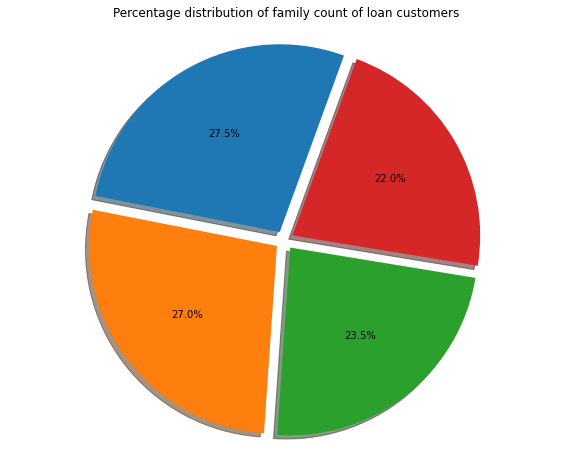

In [36]:
fig1,ax1 = plt.subplots(figsize = (10,8))
explode = (0.05,0.05,0.05,0.05)
ax1.pie(temp_df['Family'],explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 70)
ax1.axis('equal')

plt.title("Percentage distribution of family count of loan customers")
print('RED','- Family of 1')
print('GREEN','- Family of 2')
print('ORANGE','- Family of 3')
print('BLUE','- Family of 4')
print()

In [37]:
value_count['Education']

1    1940
3    1462
2    1375
Name: Education, dtype: int64

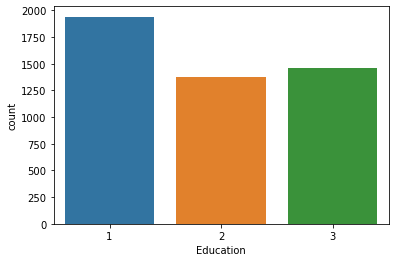

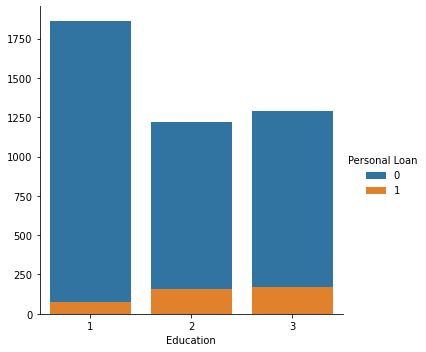

In [38]:
sns.countplot(df4['Education'])
sns.FacetGrid(df4,hue = 'Personal Loan',height = 5).map(sns.countplot,'Education',).add_legend()

In [39]:
#percentage of customers in each level of education

condition = (df4['Personal Loan'] == 1)
temp = df4[condition]

x = temp['Education'].value_counts()
temp_df = pd.DataFrame(x.reset_index())
temp_df.columns = ['labels','Education']

GREEN - Under-Graduate
ORANGE - Graduate
BLUE - Advanced/Professional



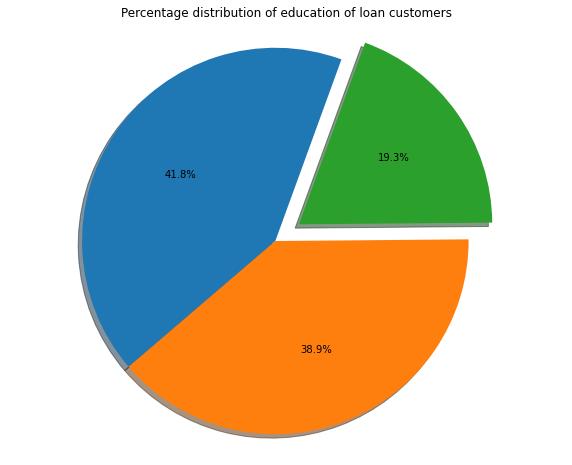

In [40]:
fig1,ax1 = plt.subplots(figsize = (10,8))
explode = (0,0.0,0.15)
ax1.pie(temp_df['Education'],explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 70)
ax1.axis('equal')

plt.title("Percentage distribution of education of loan customers")
print('GREEN','- Under-Graduate')
print('ORANGE','- Graduate')
print('BLUE','- Advanced/Professional')
print()

In [41]:
value_count['Mortgage']

0      3376
98       17
103      16
91       16
83       16
       ... 
173       1
344       1
336       1
300       1
345       1
Name: Mortgage, Length: 258, dtype: int64

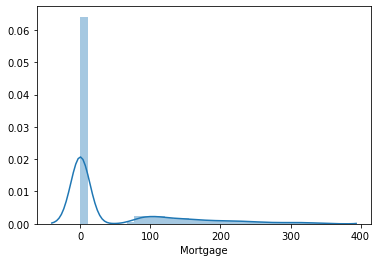

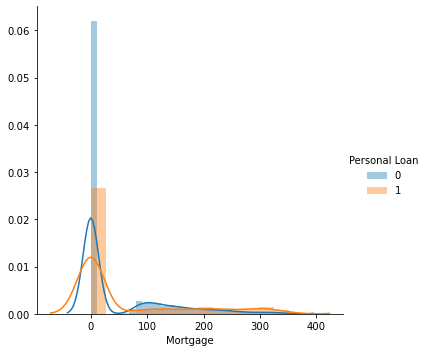

In [42]:
sns.distplot(df4['Mortgage'])
sns.FacetGrid(df4,hue = 'Personal Loan',height = 5).map(sns.distplot,'Mortgage').add_legend()

In [43]:
value_count['Securities Account']

0    4277
1     500
Name: Securities Account, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


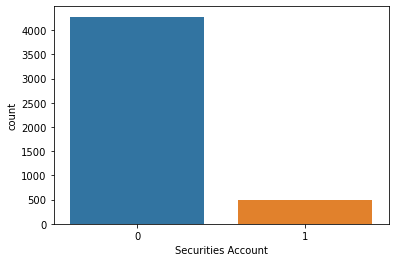

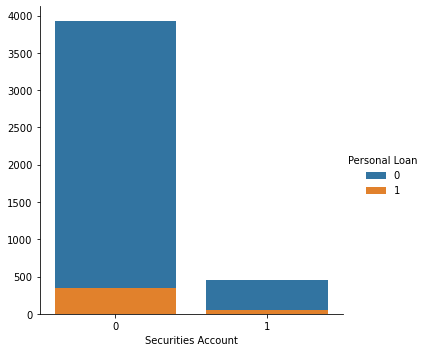

In [44]:
sns.countplot( df4['Securities Account'] )
sns.FacetGrid(df4,hue = 'Personal Loan',height = 5).map(sns.countplot,'Securities Account').add_legend()

In [45]:
condition = (df4['Securities Account'] == 1)
temp = df4[condition]

x = temp['Personal Loan'].value_counts()
temp_df = pd.DataFrame(x.reset_index())
temp_df.columns = ['labels','Personal Loan']
 

Text(0.5, 1.0, 'Percentage of CD account customers which has taken loan')

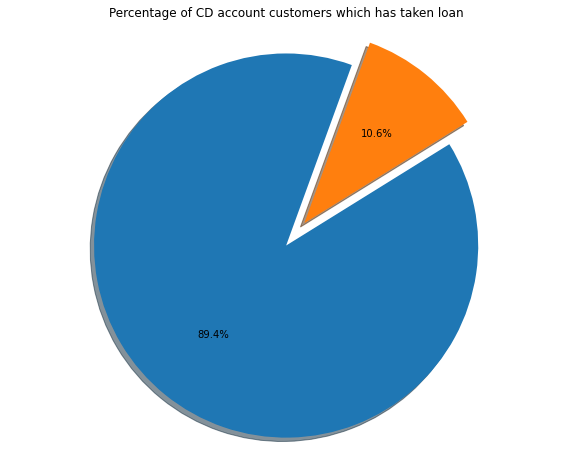

In [46]:
fig1,ax1 = plt.subplots(figsize = (10,8))
explode = (0,0.15)
ax1.pie(temp_df['Personal Loan'],explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 70)
ax1.axis('equal')
plt.title('Percentage of CD account customers which has taken loan')

In [47]:
value_count['CD Account']

0    4507
1     270
Name: CD Account, dtype: int64

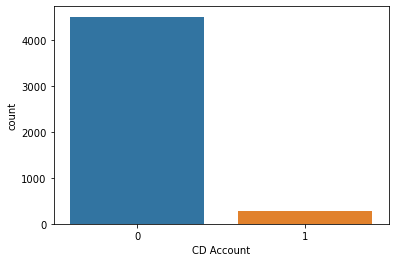

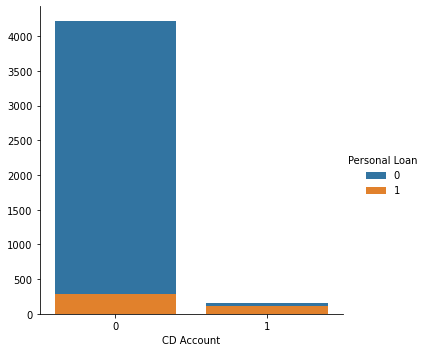

In [49]:
sns.countplot( df4['CD Account'] )
sns.FacetGrid(df4,hue = 'Personal Loan',height = 5,).map(sns.countplot,'CD Account').add_legend()


In [50]:
condition = (df4['CD Account'] == 1)
temp = df4[condition]

x = temp['Personal Loan'].value_counts()
temp_df = pd.DataFrame(x.reset_index())
temp_df.columns = ['labels','Personal Loan']


Text(0.5, 1.0, 'Percentage distribution of cd account attribute of total loan customrs')

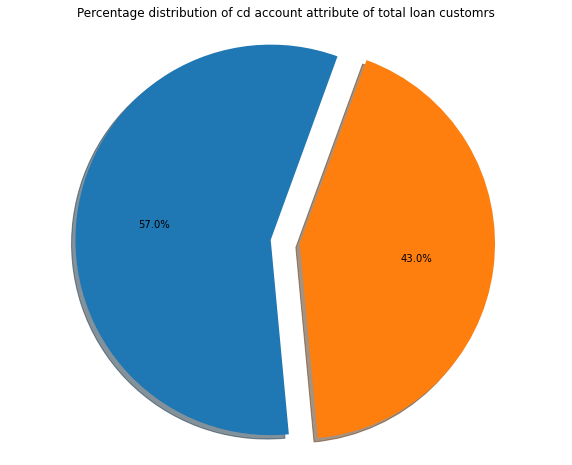

In [51]:
fig1,ax1 = plt.subplots(figsize = (10,8))
explode = (0,0.15)
ax1.pie(temp_df['Personal Loan'],explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 70)
ax1.axis('equal')
plt.title("Percentage distribution of cd account attribute of total loan customrs")

In [53]:
value_count['Online']

1    2850
0    1927
Name: Online, dtype: int64

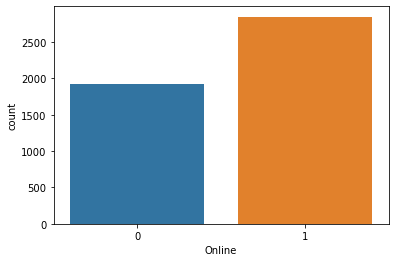

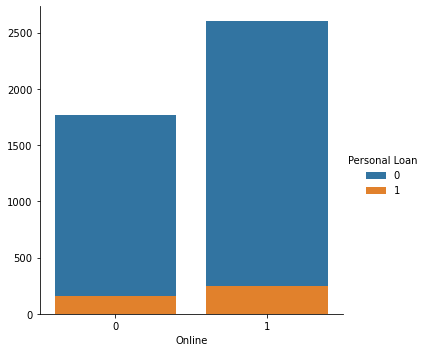

In [54]:
sns.countplot( df4['Online'] )
sns.FacetGrid(df4,hue = 'Personal Loan',size = 5).map(sns.countplot,'Online').add_legend()

In [56]:
value_count['CreditCard']

0    3365
1    1412
Name: CreditCard, dtype: int64

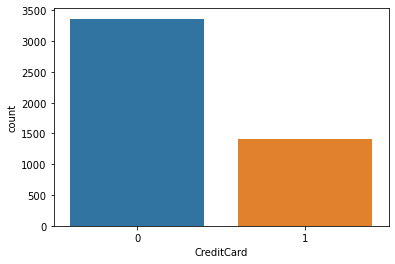

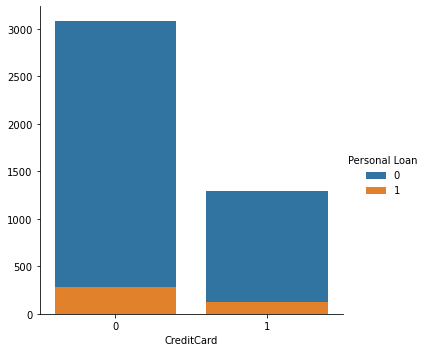

In [57]:
sns.countplot( df4['CreditCard'] )
sns.FacetGrid(df4,hue = 'Personal Loan',size = 5).map(sns.countplot, 'CreditCard').add_legend()

BLUE - Loan Customers
ORANGE - Did not take Loan



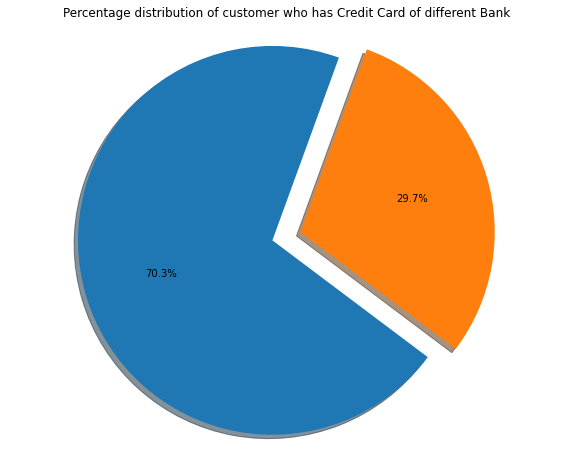

In [58]:
#To check the behaviour of people who use credit card of different bank

condition = (df4['CreditCard'] == 0)  & (df4['CCAvg'] >= 0 )
temp = df4.loc[condition,'Personal Loan'].value_counts()         #temp[1] has count of loan customers with given condition
total = df4['Personal Loan'].value_counts()[1]                   #count of total loan customers
y = total - temp[1]                                             #count of remaining loan customers
                                                                
list_count = [temp[1],y]
temp = pd.DataFrame(list_count,index= ["cc","remaining"])


fig1,ax1 = plt.subplots(figsize = (10,8))
explode = (0,0.15)
ax1.pie(temp[0],explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 70)
ax1.axis('equal')
plt.title("Percentage distribution of customer who has Credit Card of different Bank")
print('BLUE', "- Loan Customers")
print("ORANGE", '- Did not take Loan')
print()

In [59]:
#income_group_not_customer

income_group_not_taken = {}
groups = [("below 40",40),("40-65",65),("65-100",100),("above 100",224)]
for name,group in groups :
  if group == 40 :
    g = 0
  elif group == 65:
    g = 40
  elif  group == 100:
    g=65
  else :
    g = 100
  condition = (df4['Income'] <= group) & (df4['Income'] > g) & (df4['Personal Loan'] == 0)
  income_group_not_taken[name] = df4.loc[condition,'Personal Loan'].count()

x1 = list(income_group_not_taken.keys())
y1 = list(income_group_not_taken.values())
print(x1)
print(y1)

['below 40', '40-65', '65-100', 'above 100']
[1389, 1217, 1137, 630]


In [60]:
#income_group_customer

income_group_taken = {}
#groups = [("below 35",35),("35-45",45),("45-55",55),("55-67",67)]
for name,group in groups :
  if group == 40 :
    g = 0
  elif group == 65:
    g = 40
  elif  group == 100:
    g=65
  else :
    g = 100
  
  condition = (df4['Income'] <= group) & (df4['Income'] > g) & (df4['Personal Loan'] == 1)
  income_group_taken[name] = df4.loc[condition,'Personal Loan'].count()

x2 = list(income_group_taken.keys())
y2 = list(income_group_taken.values())
print(x2)
print(y2)


['below 40', '40-65', '65-100', 'above 100']
[0, 3, 37, 364]


           Count
below 40       0
40-65          3
65-100        37
above 100    364

Lowest Income among Loan Customer is  60



Orange - who did not take Loan 
Red - who did take Loan 



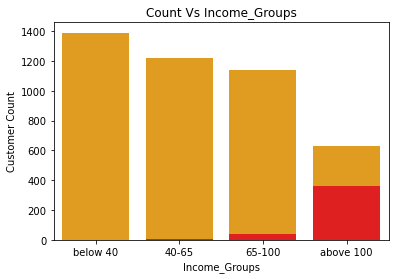

In [61]:
sns.barplot(x = x1,y = y1,color = 'Orange')
plt.title("Count Vs Income_Groups" )
plt.ylabel("Customer Count")
plt.xlabel("Incomes_Groups")

sns.barplot(x = x2,y = y2,color = 'Red')
plt.title("Count Vs Income_Groups" )
plt.ylabel("Customer Count")
plt.xlabel("Income_Groups")

df_income = pd.DataFrame(y2,index = x1,columns = ["Count"])
print(df_income)
print()
min_income_customer = df4.loc[df['Personal Loan']==1,'Income'].min()
print('Lowest Income among Loan Customer is ',min_income_customer)
print()
print()
print()
print("Orange", "- who did not take Loan ")
print("Red", "- who did take Loan ")
print()

In [62]:
#ccavg_group_not_customer

ccavg_group_not_taken = {}
groups = [("below 0.7",0.7),("0.7-1.5",1.5),("1.5-2.5",2.5),("above 2.5",10)]
for name,group in groups :
  if group == 0.7 :
    g = 0
  elif group == 1.5:
    g = 0.7
  elif  group == 2.5:
    g=1.5
  else :
    g = 2.5
  condition = (df4['CCAvg'] <= group) & (df4['CCAvg'] > g) & (df4['Personal Loan'] == 0)
  ccavg_group_not_taken[name] = df4.loc[condition,'Personal Loan'].count()

x1 = list(ccavg_group_not_taken.keys())
y1 = list(ccavg_group_not_taken.values())
print(x1)
print(y1)

['below 0.7', '0.7-1.5', '1.5-2.5', 'above 2.5']
[1228, 1086, 1182, 774]


In [63]:
#ccavg_group_customer

ccavg_group_taken = {}

for name,group in groups :
  if group == 0.7 :
    g = 0
  elif group == 1.5:
    g = 0.7
  elif  group == 2.5:
    g=1.5
  else :
    g = 2.5
  
  condition = (df4['CCAvg'] <= group) & (df4['CCAvg'] > g) & (df4['Personal Loan'] == 1)
  ccavg_group_taken[name] = df4.loc[condition,'Personal Loan'].count()

x2 = list(ccavg_group_taken.keys())
y2 = list(ccavg_group_taken.values())
print(x2)
print(y2)

['below 0.7', '0.7-1.5', '1.5-2.5', 'above 2.5']
[34, 34, 37, 298]


           Count
below 0.7     34
0.7-1.5       34
1.5-2.5       37
above 2.5    298

Loan Customer with Lowest Spending by Credit Card is  0.0



Orange - who did not take Loan 
Red - who did take Loan 



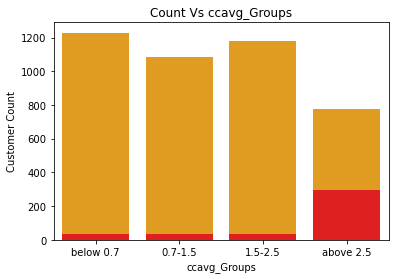

In [64]:
sns.barplot(x = x1,y = y1,color = 'Orange')
plt.title("Count Vs ccavg_Groups" )
plt.ylabel("Customer Count")
plt.xlabel("ccavg_Groups")

sns.barplot(x = x2,y = y2,color = 'Red')
plt.title("Count Vs ccavg_Groups" )
plt.ylabel("Customer Count")
plt.xlabel("ccavg_Groups")

df_income = pd.DataFrame(y2,index = x1,columns = ["Count"])
print(df_income)
print()
min_ccavg_customer = df4.loc[df['Personal Loan']==1,'CCAvg'].min()
print('Loan Customer with Lowest Spending by Credit Card is ',min_ccavg_customer)
print()
print()
print()
print("Orange", "- who did not take Loan ")
print("Red", "- who did take Loan ")
print()

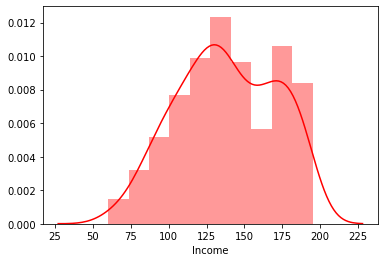

In [67]:
condition = ( df4['CCAvg'] >= 2.5 ) & (df4['Personal Loan'] == 1 )

df_cc_income = df4.loc[condition,'Income']

sns.distplot(df_cc_income,color = "red",bins = 10)

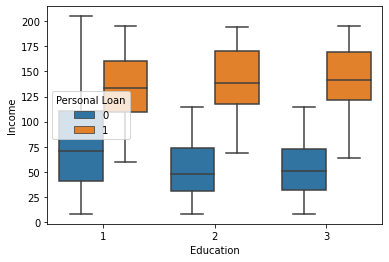

In [68]:
sns.boxplot(x='Education',y='Income',hue = 'Personal Loan',data=df4)

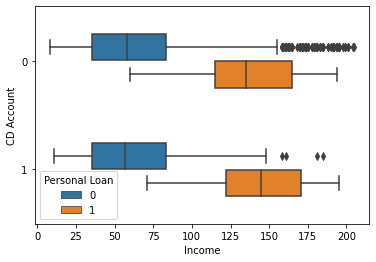

In [69]:
sns.boxplot(x='Income',y='CD Account',hue = 'Personal Loan',data=df4,orient = 'h',width = 0.5)

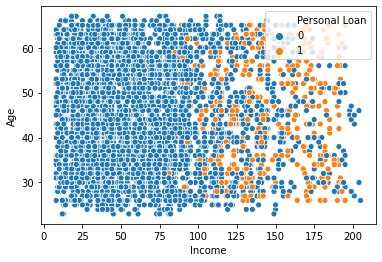

In [70]:
sns.scatterplot(x='Income',y='Age',data=df4,hue = 'Personal Loan')

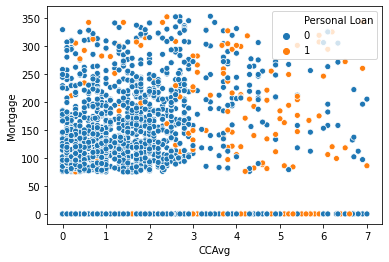

In [71]:
sns.scatterplot(x='CCAvg',y='Mortgage',data=df4,hue = 'Personal Loan')

In [72]:
condition =  ( df4['Mortgage'] <=200 ) & (df4['CCAvg'] <= 2)
count_en = df4.loc[condition,'Personal Loan'].value_counts()
print(count_en)

0    2948
1      67
Name: Personal Loan, dtype: int64


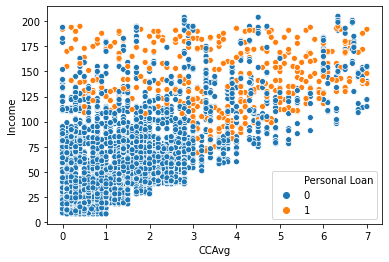

In [73]:
sns.scatterplot(x='CCAvg',y='Income',data=df4,hue = 'Personal Loan')

In [74]:
condition =  ( df4['Income'] <=100 ) & (df4['CCAvg'] <= 3)
count_en = df4.loc[condition,'Personal Loan'].value_counts()
print(count_en)

0    3590
1       6
Name: Personal Loan, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


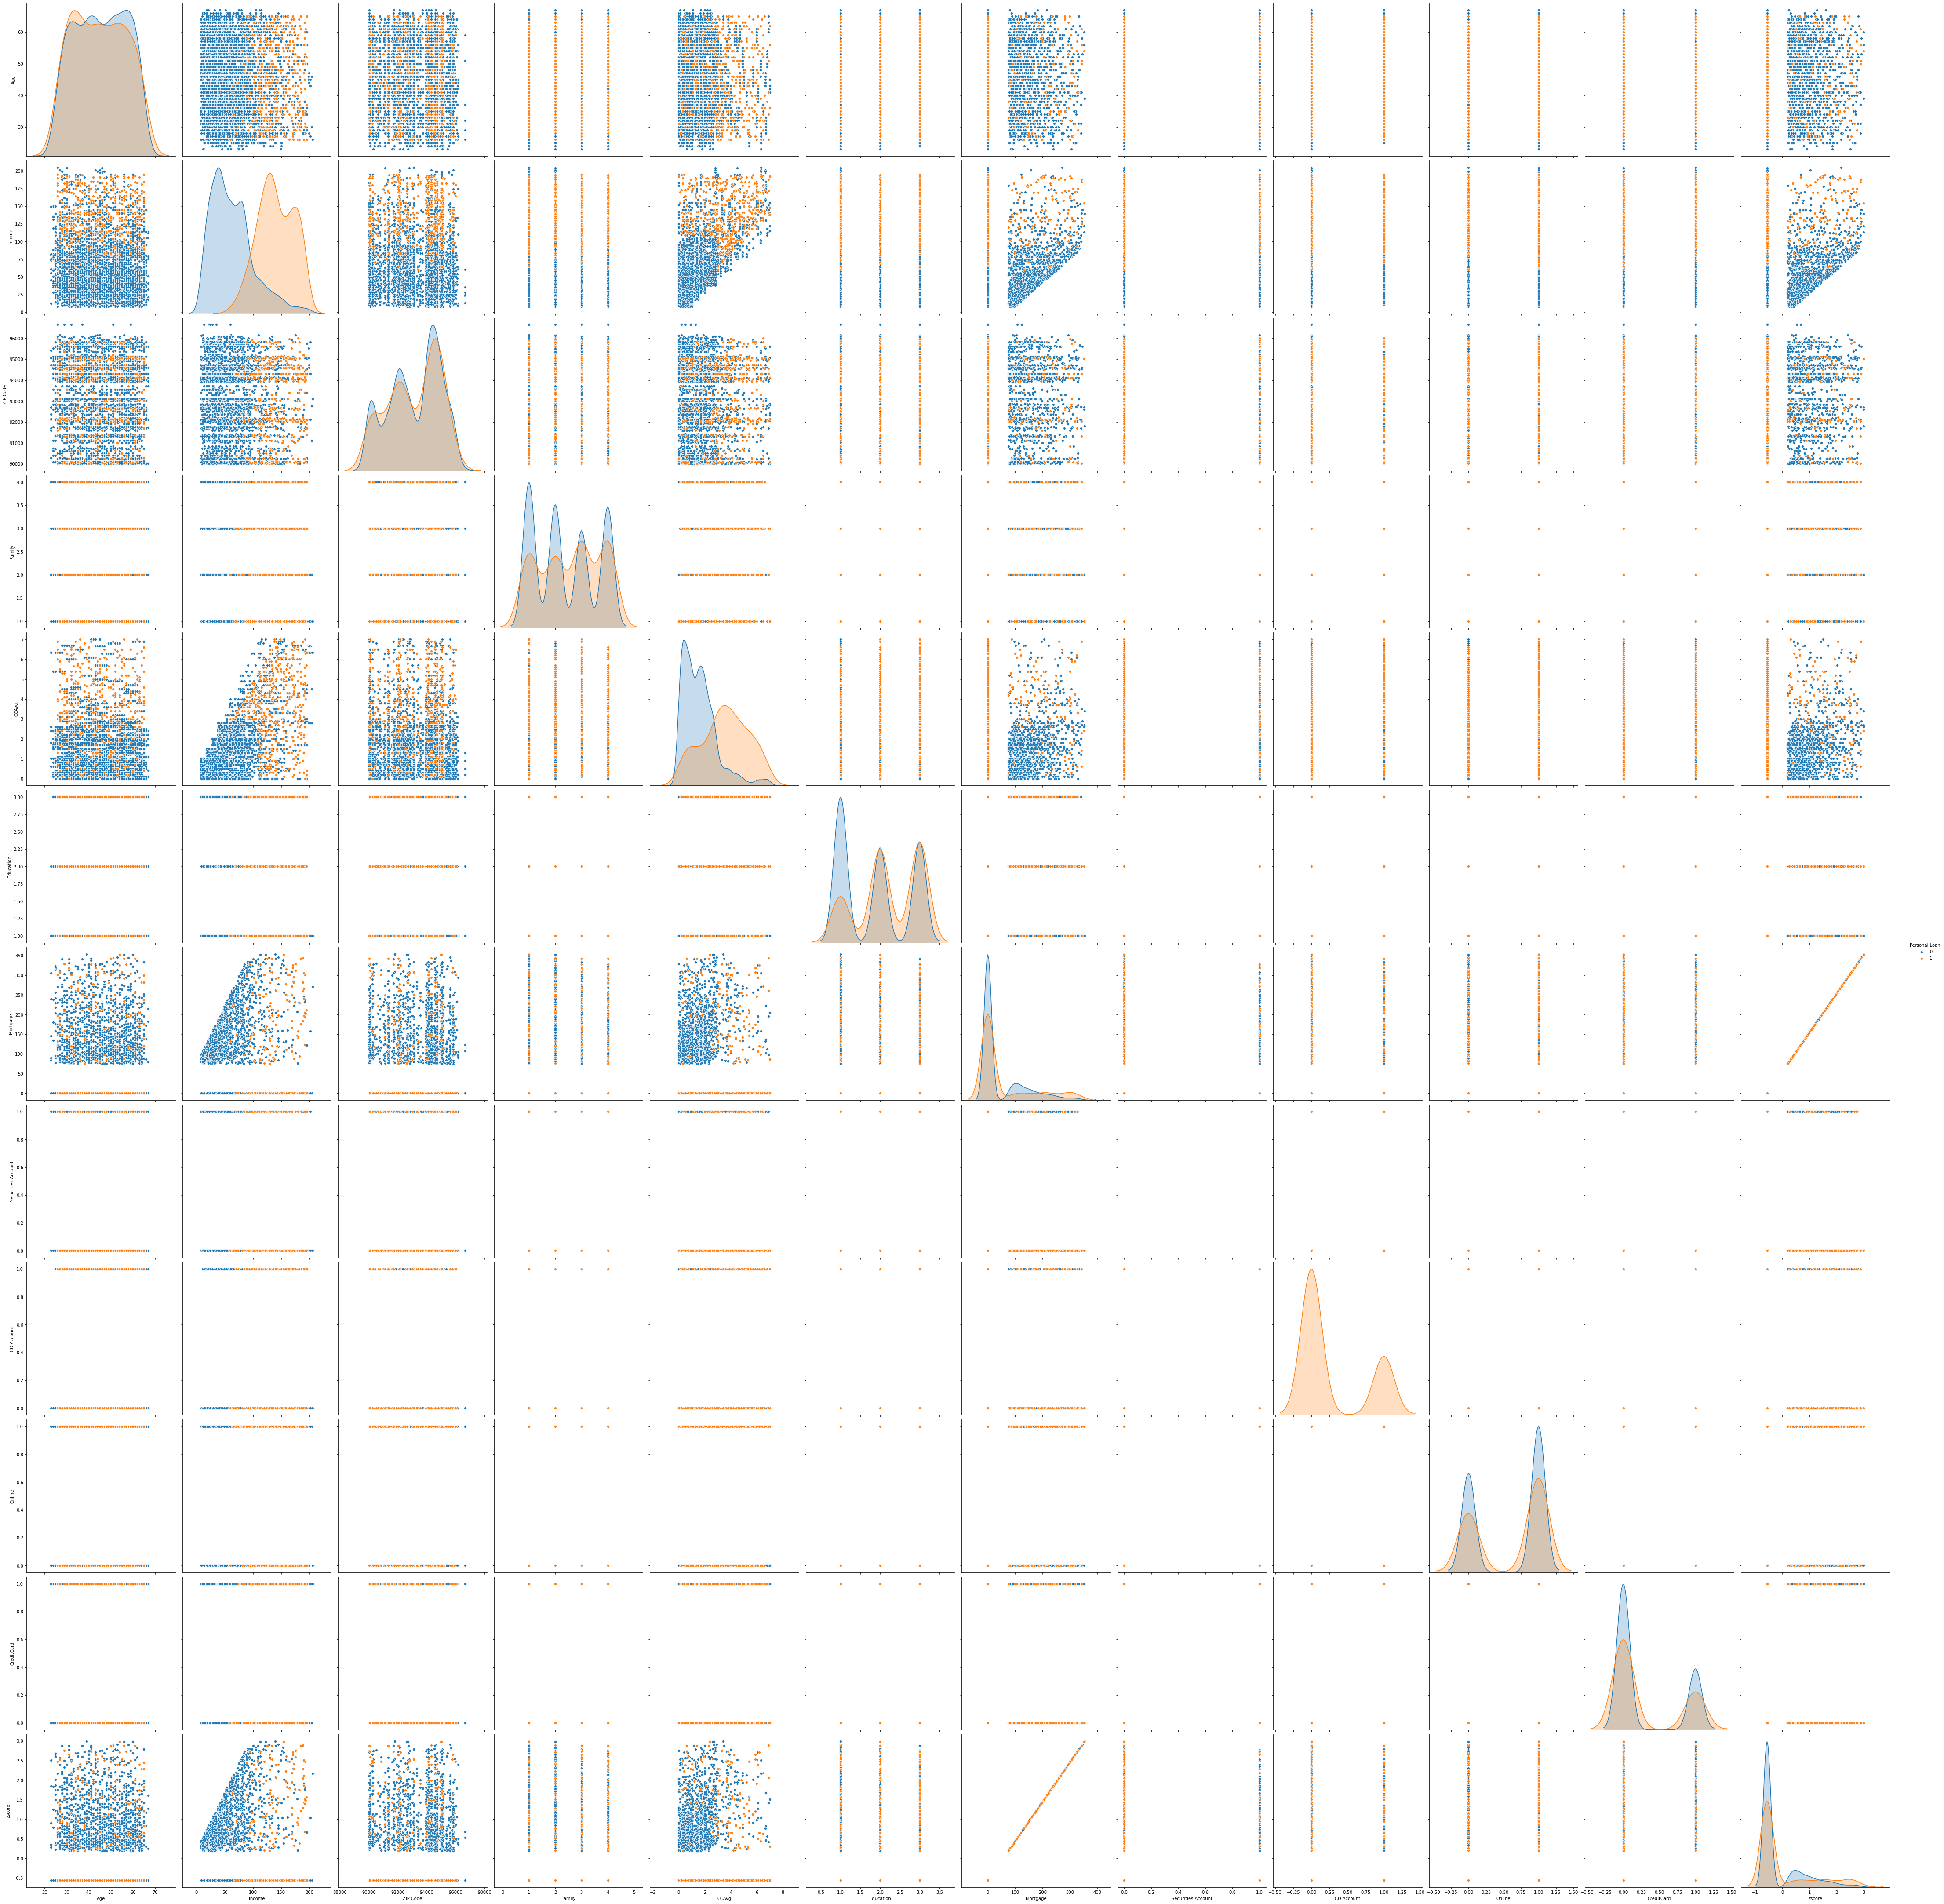

In [83]:
sns.pairplot(df4,size = 5,hue= 'Personal Loan')

Text(0.5, 1.0, 'correlation matrix')

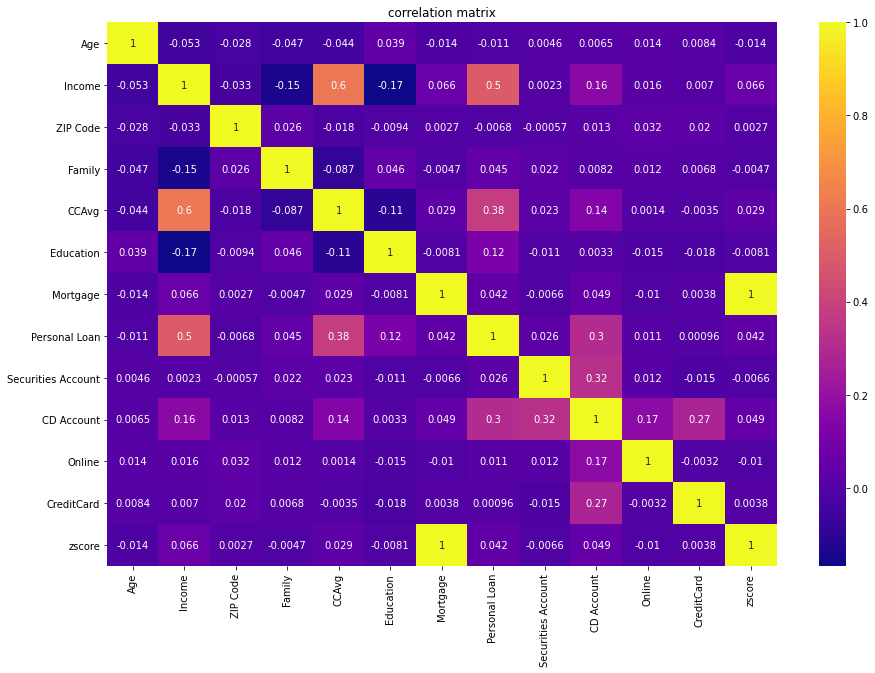

In [78]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df4.corr(),annot = True,cmap = 'plasma',)
plt.title("correlation matrix")

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
data_X = df4.loc[:,['Income','CCAvg','CD Account','Education','Family','Mortgage','Securities Account']]
data_Y = df4['Personal Loan']                       #removed ccavg #added family #mortgage added #added ccavg after normalization

In [81]:
#binning - To reduce skewness of data

data_X['Mortgage_b'] = pd.cut(data_X['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
data_X.drop('Mortgage',axis = 1,inplace = True)

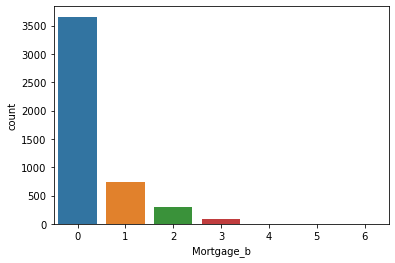

In [84]:
sns.countplot(data_X['Mortgage_b'])

In [85]:
#splitting of data by stratified sampling to maintain same distribution of loan customers in both train and test data

X_train,X_test,y_train,y_test = train_test_split(data_X,data_Y,test_size=0.3,random_state=0,stratify = data_Y)

In [86]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

norm = MinMaxScaler().fit(X_test)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

sns.distplot(X_test['Income'])

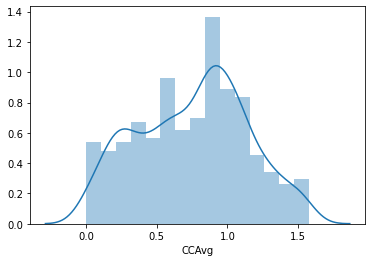

In [91]:
sns.distplot(X_test['CCAvg'])

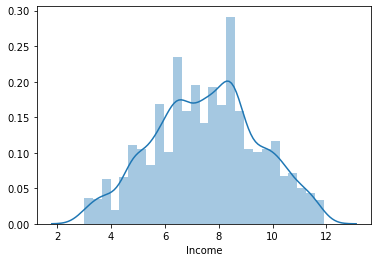

In [92]:
sns.distplot(X_train['Income'])

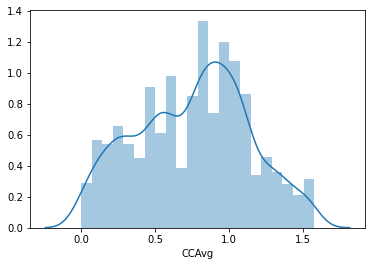

In [93]:
sns.distplot(X_train['CCAvg'])

In [94]:
#Importing logistic Regressiion Library and fitting model 
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state =24)

classifier.fit(X_train,y_train)  #fitting data

LogisticRegression(random_state=24)

In [95]:
#Predicting on test set

y_pred_test = classifier.predict(X_test) #predicting for test data

In [96]:
#Cross-Validation Score

from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X_train , y_train, cv=5)          #stratified KFold For every test set to have same distibution
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.95216741 0.96263079 0.95814649 0.95958084 0.94760479]


In [97]:
 #confusion matrix for test data

from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred_test)                             
print(pd.DataFrame(cm))


      0   1
0  1281  32
1    42  79


In [98]:
#metrics

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy_test = accuracy_score(y_test, y_pred_test)                   #accuracy of model for test data

print ("Accuracy on test set is ", accuracy_test)          

Accuracy on test set is  0.9483960948396095


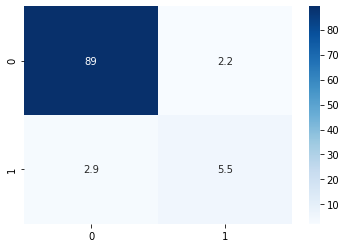

In [101]:
sns.heatmap(cm*100/np.sum(cm), annot=True,cmap='Blues')

In [100]:
y_pred_train = classifier.predict(X_train)                         #predicting on train data

In [102]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on train set is ",accuracy_train)                 #accuracy of model for train data

Accuracy on train set is  0.9557283876757403


In [103]:
#finding probability of prediction
prob = classifier.predict_proba(X_test)
df_p = pd.DataFrame(prob[:,0],columns=['probability'])                    #probability of each prediction
df_p

probability
0        0.999710
1        0.999241
2        0.999714
3        0.942407
4        0.999993
...           ...
1429     0.048123
1430     0.311008
1431     0.999892
1432     0.977127
1433     0.310788

[1434 rows x 1 columns]

In [104]:
 #mean sqaured error and r2_score
from sklearn.metrics import mean_squared_error,r2_score                       #mse and r2_score of model for test data
mse = mean_squared_error(y_test,y_pred_test)      
r2_score = r2_score(y_test,y_pred_test)  
print(mse)
print(r2_score)

0.05160390516039052
0.3320702699640593


In [105]:
from sklearn.metrics import mean_squared_error,r2_score                      #mse and r2_score of model for train data
mse = mean_squared_error(y_train,y_pred_train)      
r2_score = r2_score(y_train,y_pred_train)  
print(mse)
print(r2_score)

0.04427161232425965
0.4286657890482459


In [106]:
#classification report of model on test data

report = classification_report(y_test, y_pred_test)                        
 
print (report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1313
           1       0.71      0.65      0.68       121

    accuracy                           0.95      1434
   macro avg       0.84      0.81      0.83      1434
weighted avg       0.95      0.95      0.95      1434



In [107]:
report = classification_report(y_train, y_pred_train)              #classification report of model on train data

print (report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3060
           1       0.80      0.63      0.71       283

    accuracy                           0.96      3343
   macro avg       0.88      0.81      0.84      3343
weighted avg       0.95      0.96      0.95      3343



In [108]:
 #importing all the classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier                      
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [109]:
models = []
models.append(("LogisticRegression",LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('DecisionTree', DecisionTreeClassifier(max_depth=8)))                          #appending all the classifiers to the list for iteration
models.append(('NaiveBayes', GaussianNB()))
models.append(('RandomnForest',RandomForestClassifier(n_estimators = 1000,max_depth=8)))


In [110]:
#comparison of classifiers


from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
score = {}
accuracy_test = {}
accuracy_train = {}
con_matrix_test = {}
con_matrix_train = {}
report_test = {}
report_train = {}
roc_auc_scores = {}
for name, model in models:
    
    classifier = model

    classifier.fit(X_train,y_train)                                   #fitting data

    y_pred_test = classifier.predict(X_test)                          #predicting on test data

    scores = cross_val_score(classifier, X_train , y_train, cv=5)     #cross_validation_score
    score[name] = scores.mean()                                       #adding it to a dictionary storing all the validation score

    accuracy_te = accuracy_score(y_test, y_pred_test)
    accuracy_test[name] = accuracy_te                                 #adding it to a dictionary storing all the accuracy scores for test data

    cm = confusion_matrix(y_test,y_pred_test)
    con_matrix_test[name] = cm                                        #adding it to a dictionary storing all the confusion matrices for test data


    y_pred_train = classifier.predict(X_train)

    accuracy_tr = accuracy_score(y_train, y_pred_train)
    accuracy_train[name] = accuracy_tr                                #adding it to a dictionary storing all the accuracy scores for train data
    
    roc_auc_scores[name] = roc_auc_score(y_test, y_pred_test)
                                         
    report = classification_report(y_test, y_pred_test)
    report_test[name] = report
    print()                                                           #printing classification report
    print(name)
    print("Classification report of classifier ",name,'on test data')
    print()
    print(report)

    report = classification_report(y_train, y_pred_train)
    report_train[name] = report
    print("Classification report of classifier ",name,'on train data')
    print()
    print(report)

    
    


LogisticRegression
Classification report of classifier  LogisticRegression on test data

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1313
           1       0.71      0.65      0.68       121

    accuracy                           0.95      1434
   macro avg       0.84      0.81      0.83      1434
weighted avg       0.95      0.95      0.95      1434

Classification report of classifier  LogisticRegression on train data

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3060
           1       0.80      0.63      0.71       283

    accuracy                           0.96      3343
   macro avg       0.88      0.81      0.84      3343
weighted avg       0.95      0.96      0.95      3343


KNN
Classification report of classifier  KNN on test data

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1313
           1    

In [111]:
#to store all the metrics in single dataframe to facilitate easy comparison of performance of all the classifiers
metrics = [score, accuracy_test,accuracy_train,roc_auc_scores] 

comparison = pd.DataFrame(metrics,index = ['cross-validation_score',"accuracy_test",'accuracy_train','roc_auc_score'],) #adding all the metrics in a single dataframe


In [112]:
for i in con_matrix_test :
  print(i)
  confusion_matrix = pd.DataFrame(con_matrix_test[i])
  print('confusion matrix for ',i,'is ')
  print(confusion_matrix)
  print()

LogisticRegression
confusion matrix for  LogisticRegression is 
      0   1
0  1281  32
1    42  79

KNN
confusion matrix for  KNN is 
      0    1
0  1308    5
1    20  101

DecisionTree
confusion matrix for  DecisionTree is 
      0    1
0  1303   10
1    13  108

NaiveBayes
confusion matrix for  NaiveBayes is 
      0   1
0  1268  45
1    58  63

RandomnForest
confusion matrix for  RandomnForest is 
      0    1
0  1308    5
1    17  104



comparison of accuraccies


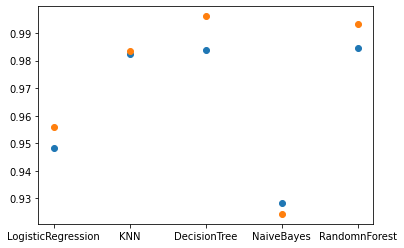

In [113]:
df6 = pd.DataFrame(models)
plt.scatter(df6[0],comparison.loc["accuracy_test",:])
plt.scatter(df6[0],comparison.loc["accuracy_train",:])
print("comparison of accuraccies")


Business Model

Model Finalization

High Precision reduces the cost of campaign but may reduce favourable outcome i.e actual target customer prediction.

High Recall may increase the favourable outcome but may increase cost of the campaign

Among above classifiers, Randomn Forest classifier has highest precision and recall.

This Model identifies the potential target customer with 95% precision which suggests that 95% target customers predicted by model are true loan customers.

This model can predict 86% of the actual target customers which signfies that out of all actual customers, model will identify 86% of actual true customers and does not predict the remaining 14% potential customers.

Decision
Target customers having Income above 100.
Target Customers having spending by Credit Card above 2.5
Target Graduate and Advanced/Professional level educated customers
Almost 50% of Loan Customers are also CD Account Customers
Securities Account Customer is less likely to take a loan

Target Loan Customer Profile

Loan Customer Profile has following Features.
1 : Income should be above 100
2 : Credit Card Spending should be above 2.5
3 : Graduate and Advanced/Professional level education since higher probability of having high Income
4 : CD account Customer of Bank

Conclusion :

The classification model built and insights from Data will help the Bank to predict the Target Personal Loan Customers before approching them and so can focus their marketing efforts only on these customers.
This method of targeted approach will reduce the cost, time and efforts required for campaign.
Avoid unnecessary contact to any customer which will also reduce customer unsatisfaction.


